In [1]:
print("""
@Title        : Technical Analysis and Building Interactive Dashboards
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2023-12-19 21:17:03
@Description  : 
""")


@Title        : Technical Analysis and Building Interactive Dashboards
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2023-12-19 21:17:03
@Description  : 



In [3]:
import talib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Calculating the most popular technical indicators

In [4]:
df = pd.read_csv('../data/IBM_20200101_20201231.csv',
                 parse_dates=['Date'],
                 index_col='Date')
df.sample()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-09,112.810707,112.810707,110.133842,110.621414,93.013535,4982098


In [11]:
df['sma_20'] = talib.SMA(df['Close'], timeperiod=20)

<AxesSubplot:title={'center':'20-day Simple Moving Average (SMA)'}, xlabel='Date'>

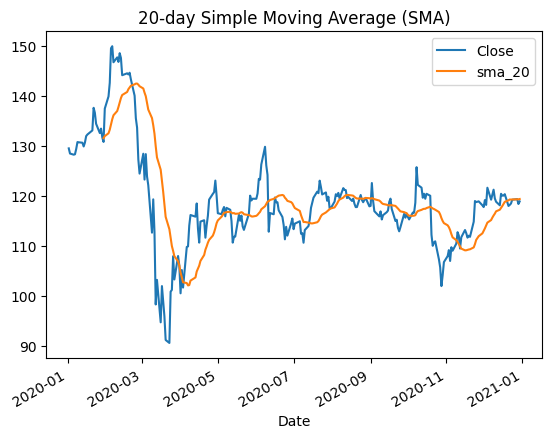

In [13]:
df[['Close', 'sma_20']].plot(title='20-day Simple Moving Average (SMA)')

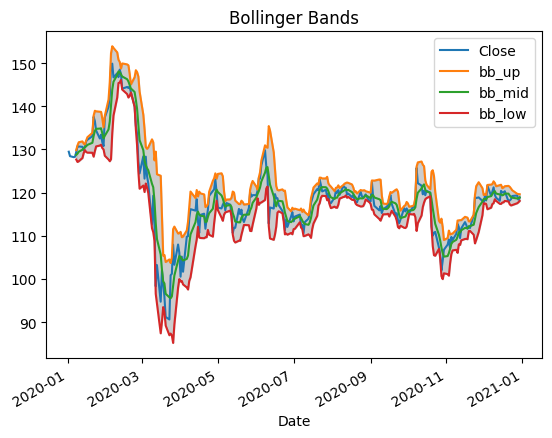

In [18]:
df['bb_up'], df['bb_mid'], df['bb_low'] = talib.BBANDS(df['Close'])
fig, ax = plt.subplots()

df.loc[:, ['Close', 'bb_up', 'bb_mid', 'bb_low']].plot(ax=ax, title='Bollinger Bands')
ax.fill_between(df.index, df['bb_low'], df['bb_up'],
                color='gray', alpha=.4)

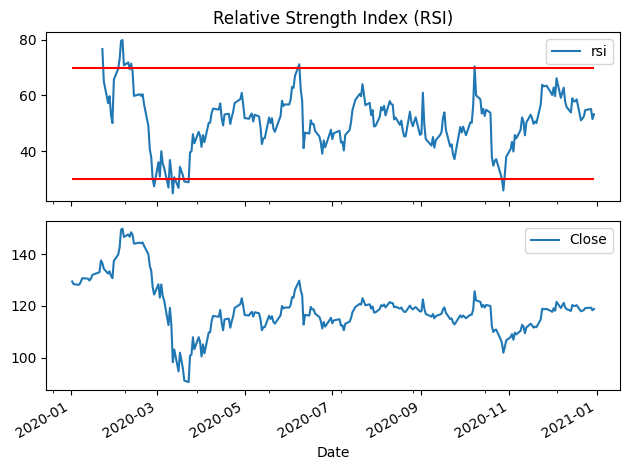

In [28]:
df['rsi'] = talib.RSI(df['Close'])
fig, ax = plt.subplots(2, 1, sharex=True)
df[['rsi']].plot(ax=ax[0], title='Relative Strength Index (RSI)')
ax[0].hlines(y=30,
           xmin=df.index.min(),
           xmax=df.index.max(),
           colors='red')
ax[0].hlines(y=70,
           xmin=df.index.min(),
           xmax=df.index.max(),
           colors='red')
df[['Close']].plot(ax=ax[1])
plt.tight_layout()
plt.show()

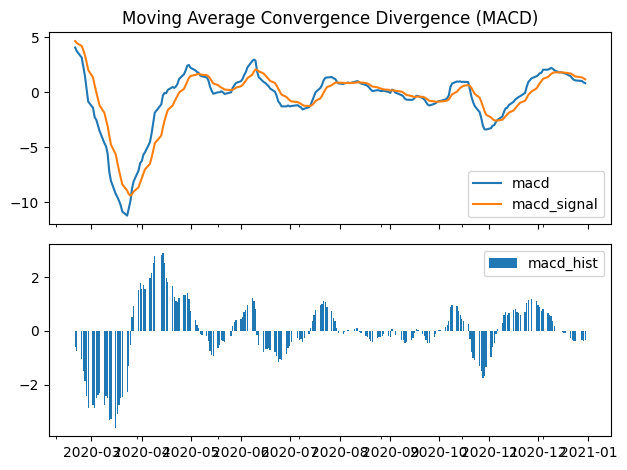

In [32]:
df['macd'], df['macd_signal'], df['macd_hist'] = talib.MACD(
    df['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)
fig, ax = plt.subplots(2, 1, sharex=True)
df[['macd', 'macd_signal']].plot(ax=ax[0],
                                 title="Moving Average Convergence Divergence (MACD)")
ax[1].bar(df.index, df['macd_hist'].values, label='macd_hist')
ax[1].legend()
plt.tight_layout()

### There’s more…

In [1]:
from ta import add_all_ta_features

In [5]:
df = df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
df = add_all_ta_features(df, open='Open', high='High',
                         low='Low', close='Close', volume='Volume')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-01-02 to 2020-12-30
Data columns (total 91 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       252 non-null    float64
 1   High                       252 non-null    float64
 2   Low                        252 non-null    float64
 3   Close                      252 non-null    float64
 4   Volume                     252 non-null    int64  
 5   volume_adi                 252 non-null    float64
 6   volume_obv                 252 non-null    int64  
 7   volume_cmf                 233 non-null    float64
 8   volume_fi                  239 non-null    float64
 9   volume_em                  251 non-null    float64
 10  volume_sma_em              238 non-null    float64
 11  volume_vpt                 251 non-null    float64
 12  volume_vwap                239 non-null    float64
 13  volume_mfi                 239 

## Downloading the technical indicators

In [7]:
from alpha_vantage.techindicators import TechIndicators

In [11]:
with open('../../token/alphavantage.txt', 'r') as f:
    token = f.read()
ta_api = TechIndicators(key=token,
                        output_format='pandas')

In [12]:
rsi_df, rsi_meta = ta_api.get_rsi(symbol='IBM',
                                  time_period=14)

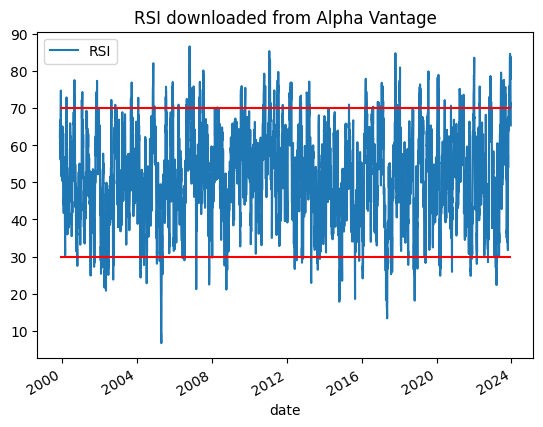

In [18]:
fig, ax = plt.subplots()
rsi_df.plot(ax=ax,
            title="RSI downloaded from Alpha Vantage")
ax.hlines(y=30,
          xmin=rsi_df.index.min(),
          xmax=rsi_df.index.max(),
          color="red")
ax.hlines(y=70,
          xmin=rsi_df.index.min(),
          xmax=rsi_df.index.max(),
          color="red")

In [19]:
rsi_meta

{'1: Symbol': 'IBM',
 '2: Indicator': 'Relative Strength Index (RSI)',
 '3: Last Refreshed': '2023-12-19',
 '4: Interval': 'daily',
 '5: Time Period': 14,
 '6: Series Type': 'close',
 '7: Time Zone': 'US/Eastern Time'}

## Recognizing candlestick patterns

In [20]:
import mplfinance as mpf

In [21]:
df = pd.read_csv('../data/BTC-USD_20201220_20231220.csv',
                 index_col='Date',
                 parse_dates=['Date'])
df.sample()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-13,22156.40625,24550.837891,21918.199219,24197.533203,24197.533203,49466362688


In [22]:
df['3_line_strike'] = talib.CDL3LINESTRIKE(
    df['Open'], df['High'], df['Low'], df['Close']
)

In [24]:
df[df['3_line_strike'] == -100]

,Open,High,Low,Close,Adj Close,Volume,3_line_strike
Date,,,,,,,
2021-11-02,60963.253906,64242.792969,60673.054688,63226.402344,63226.402344,37746665647,-100
2022-10-03,19044.068359,19653.542969,19025.226563,19623.580078,19623.580078,30484729489,-100
2023-08-07,29038.513672,29244.281250,28724.140625,29180.578125,29180.578125,13618163710,-100
2023-09-07,25748.312500,26409.302734,25608.201172,26240.195313,26240.195313,11088307100,-100


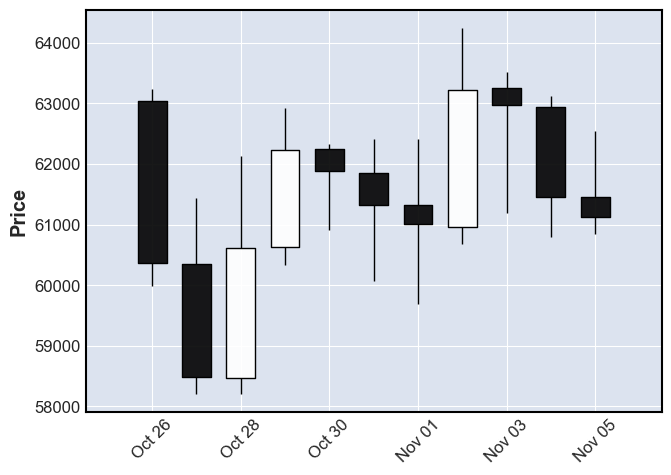

In [31]:
mpf.plot(df['2021-10-26':'2021-11-05'], type='candle')

In [32]:
df[df['3_line_strike'] == 100]

,Open,High,Low,Close,Adj Close,Volume,3_line_strike
Date,,,,,,,
2022-09-13,22371.480469,22673.820313,20062.669922,20296.707031,20296.707031,51091116622,100
2022-11-20,16712.919922,16746.779297,16248.692383,16291.832031,16291.832031,21313378652,100


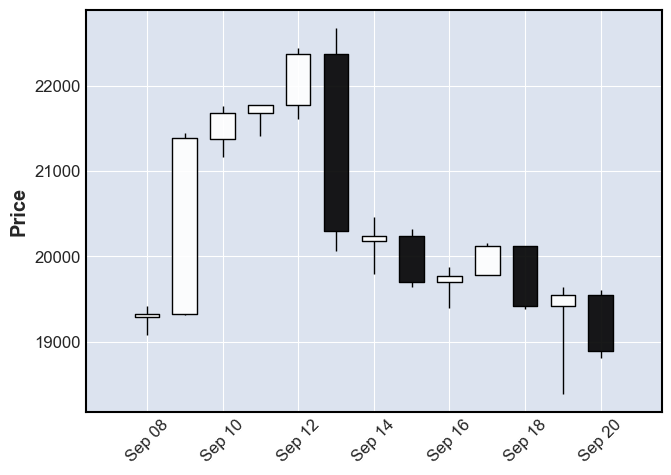

In [34]:
mpf.plot(df['2022-09-08': '2022-09-20'], type='candle')

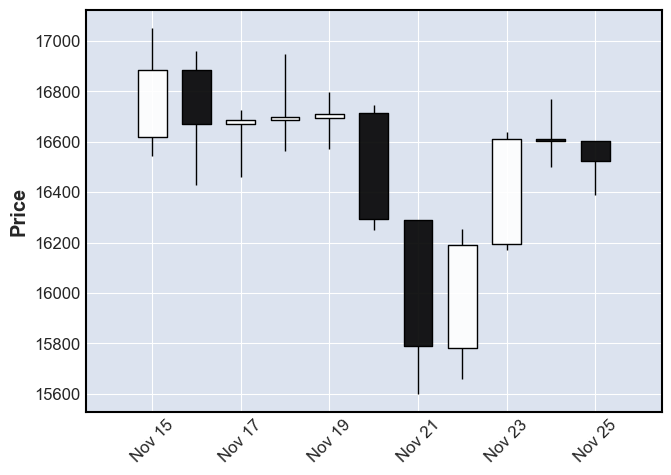

In [37]:
mpf.plot(df['2022-11-15': '2022-11-25'], type='candle')

We used the TA-Lib library to identify the three line strike pattern (with the `CDL3LINESTRIKE` function). We had to separately provide the OHLC prices as inputs for the function. We store the outputs of the function in a new column. For this function, there are three possible outputs:
- 100—Indicates the bullish variant of the pattern
- 0—No pattern detected
- -100—Indicates the bearish variant of the pattern

### There’s more…

In [38]:
candle_names = talib.get_function_groups()['Pattern Recognition']

In [40]:
for candle in candle_names:
    df[candle] = getattr(talib, candle)(df['Open'], df['High'],
                                        df['Low'], df['Close'])

In [41]:
with pd.option_context('display.max_rows', len(candle_names)):
    display(df[candle_names].describe().transpose().round(2))

,count,mean,std,min,25%,50%,75%,max
CDL2CROWS,1096.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
CDL3BLACKCROWS,1096.0,-0.09,3.02,-100.0,0.0,0.0,0.0,0.0
CDL3INSIDE,1096.0,-0.27,6.75,-100.0,0.0,0.0,0.0,100.0
CDL3LINESTRIKE,1096.0,-0.18,7.40,-100.0,0.0,0.0,0.0,100.0
CDL3OUTSIDE,1096.0,2.01,25.92,-100.0,0.0,0.0,0.0,100.0
CDL3STARSINSOUTH,1096.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
CDL3WHITESOLDIERS,1096.0,0.18,4.27,0.0,0.0,0.0,0.0,100.0
CDLABANDONEDBABY,1096.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
CDLADVANCEBLOCK,1096.0,-1.46,12.00,-100.0,0.0,0.0,0.0,0.0
CDLBELTHOLD,1096.0,0.36,40.32,-100.0,0.0,0.0,0.0,100.0


In [42]:
df[df['CDLEVENINGSTAR'] == -100]

,Open,High,Low,Close,Adj Close,Volume,3_line_strike,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,...,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-06,59171.933594,59479.578125,57646.808594,58192.359375,58192.359375,66058027988,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-09-07,52660.480469,52853.765625,43285.207031,46811.128906,46811.128906,65210059683,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-04-29,39768.617188,39887.269531,38235.535156,38609.824219,38609.824219,30882994649,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100
2022-12-15,17813.644531,17846.744141,17322.589844,17364.865234,17364.865234,20964448341,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100


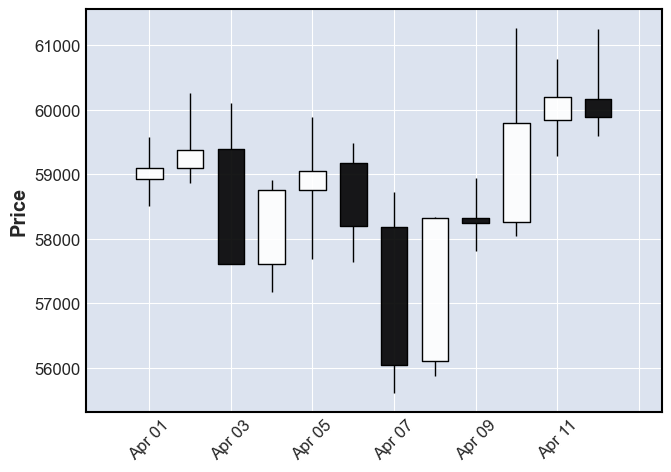

In [44]:
mpf.plot(df.loc['2021-04-01':'2021-04-12'],
         type='candle')

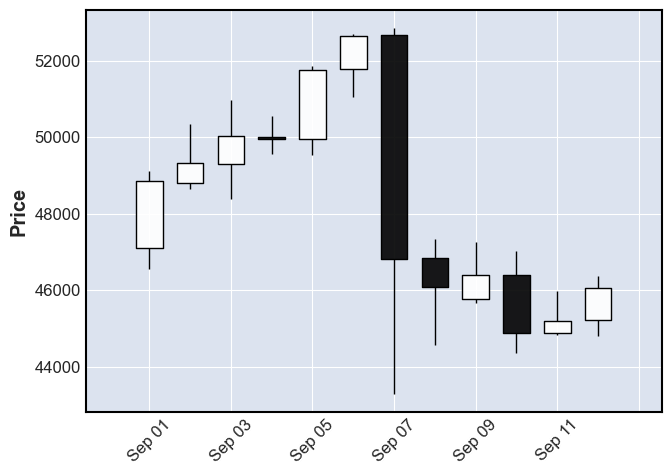

In [45]:
mpf.plot(df.loc['2021-09-01':'2021-09-12'],
         type='candle')